<a href="https://colab.research.google.com/github/casalazara/Data-Science-Aplicado/blob/master/Lab3/L3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyreadstat
!pip install pandas-profiling==2.7.1

!wget -q "https://github.com/casalazara/Data-Science-Aplicado/blob/master/Lab2/B.sav?raw=true" -O "B.sav"
!wget -q "https://github.com/casalazara/Data-Science-Aplicado/blob/master/Lab2/H.sav?raw=true" -O "H.sav"

#Importación de las librerías a usar

In [27]:
# Importante librerias o modulos que se van a usar en esta sesion
import os, sys
import numpy as np
import pandas as pd
import pandas_profiling 
import seaborn as sns
##Librerías para graficar
import matplotlib
matplotlib.style.use('ggplot')
from matplotlib import pyplot as plt

# Lectura de los datos
Para este laboratorio tendré en cuenta los datos de Fuerza de trabajo y Condiciones de la vivienda. A continuación los cargaré y eliminaré las filas y columnas queno superen un umbral que determinaré más adelante, con base en las columnas que queden determinaré las hipótesis que permitan profundizar el objetivo principal del ENUT _"La ENUT es una investigación desarrollada por el DANE, con el fin de generar información sobre el tiempo dedicado por la población de 10 años
y más a actividades de trabajo y personales"_.

In [3]:
H = pd.read_spss("H.sav") #Datos FUERZA DE TRABAJO
H

,DIRECTORIO,SECUENCIA_P,ORDEN,P6370S1,P6390S1,P6880,P6440,P6400,P1151,P1150,P1150S1,P1150S2,P1099,P1099S1,P1099S2,P1098,P427,P6500,P6750,P6760,P6426,P428,P6250,P6850,P1149,P1149S1,P1149S2,P1148S1,P1148S2,P7070,P6510,P6510S1,P6545,P6545S1,P1145,P1145S1,P1145S2
0,2915591.0,1.0,1.0,53,5529,En esta vivienda,No.,NaN,4.0,Sí,4.0,0.0,NaN,0.0,0.0,NaN,Trabajador por cuenta propia,NaN,90000.0,1.0,12.0,Trabaja solo,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No.,NaN,No.,NaN,NaN
1,2915592.0,1.0,1.0,62,113,"En el campo o área rural, mar o río",No.,NaN,12.0,No.,NaN,NaN,NaN,NaN,NaN,Realizar labores del hogar.,Trabajador de su propia finca o de finca en ar...,NaN,300000.0,1.0,96.0,2 a 4 personas,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sí,8300000.0,No.,NaN,No.,NaN,NaN
2,2915593.0,1.0,1.0,79,1810,En esta vivienda,No.,NaN,30.0,No.,NaN,NaN,NaN,NaN,NaN,Día festivo o fin de semana.,Trabajador por cuenta propia,NaN,200000.0,1.0,84.0,Trabaja solo,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sí,800000.0,No.,NaN,Sí,Dentro del país.,550000.0
3,2915593.0,1.0,2.0,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No.,NaN,No.,NaN,NaN
4,2915594.0,1.0,1.0,85,5272,"Local fijo, oficina, fábrica, etc.",No.,NaN,25.0,No.,NaN,NaN,NaN,NaN,NaN,Día festivo o fin de semana.,Trabajador por cuenta propia,NaN,200000.0,1.0,300.0,2 a 4 personas,Sí,28.0,Sí,5.0,0.0,0.0,0.0,400000.0,No,NaN,No.,NaN,No.,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123311,2965179.0,1.0,3.0,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No.,NaN,No.,NaN,NaN
123312,2965180.0,1.0,1.0,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No.,NaN,Sí,Dentro del país.,600000.0
123313,2965180.0,1.0,2.0,0,0,De puerta en puerta,No.,NaN,40.0,No.,NaN,NaN,NaN,NaN,NaN,Otra,Trabajador por cuenta propia,NaN,300000.0,1.0,24.0,Trabaja solo,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No.,NaN,No.,NaN,NaN
123314,2965180.0,1.0,3.0,0,0,"Local fijo, oficina, fábrica, etc.",Sí,Sí,72.0,No.,NaN,NaN,NaN,NaN,NaN,Otra,Obrero o empleado de empresa particular,700000.0,NaN,NaN,1.0,Trabaja solo,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No.,NaN,No.,NaN,NaN


In [4]:
B = pd.read_spss("B.sav") # Datos CONDICIONES DE LA VIVIENDA
B

,DIRECTORIO,FEX_C,REGION,DIA_REFERENCIA_2,clase,P424,P4030S1,P4030S1A1,P4030S5,P4030S3,P4030S4,P4030S4A1,P4030S2,P4020
0,2915591.0,463.993402,Central,Domingo,Cabecera,Casa,Sí,3.0,Sí,Sí,Sí,3.0,Sí,"Cemento, gravilla"
1,2915592.0,93.084381,Pacífica,Miércoles,Cabecera,Casa,Sí,1.0,No,No,Sí,3.0,No,"Baldosa, cerámica, laminado"
2,2915593.0,516.279638,Central,Domingo,Cabecera,Casa,Sí,1.0,Sí,Sí,Sí,3.0,Sí,"Baldosa, cerámica, laminado"
3,2915594.0,655.671443,Central,Domingo,Cabecera,Apartamento,Sí,1.0,Sí,Sí,Sí,3.0,Sí,"Cemento, gravilla"
4,2915595.0,326.783507,Central,Lunes,Cabecera,Apartamento,Sí,1.0,Sí,Sí,Sí,3.0,Sí,"Baldosa, cerámica, laminado"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42280,2965176.0,393.841631,Atlántica,Miércoles,Resto,Apartamento,Sí,1.0,No,No,No,NaN,No,"Cemento, gravilla"
42281,2965177.0,228.826921,Atlántica,Jueves,Resto,Casa,Sí,1.0,No,No,No,NaN,No,"Cemento, gravilla"
42282,2965178.0,555.884214,Atlántica,Domingo,Resto,Casa,Sí,1.0,Sí,No,No,NaN,Sí,"Tierra, arena"
42283,2965179.0,632.200392,Atlántica,Miércoles,Resto,Casa,Sí,1.0,Sí,No,No,NaN,Sí,"Cemento, gravilla"


In [5]:
df = pd.merge(H,B,how ='inner',on='DIRECTORIO')
df 

,DIRECTORIO,SECUENCIA_P,ORDEN,P6370S1,P6390S1,P6880,P6440,P6400,P1151,P1150,P1150S1,P1150S2,P1099,P1099S1,P1099S2,P1098,P427,P6500,P6750,P6760,P6426,P428,P6250,P6850,P1149,P1149S1,P1149S2,P1148S1,P1148S2,P7070,P6510,P6510S1,P6545,P6545S1,P1145,P1145S1,P1145S2,FEX_C,REGION,DIA_REFERENCIA_2,clase,P424,P4030S1,P4030S1A1,P4030S5,P4030S3,P4030S4,P4030S4A1,P4030S2,P4020
0,2915591.0,1.0,1.0,53,5529,En esta vivienda,No.,NaN,4.0,Sí,4.0,0.0,NaN,0.0,0.0,NaN,Trabajador por cuenta propia,NaN,90000.0,1.0,12.0,Trabaja solo,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No.,NaN,No.,NaN,NaN,463.993402,Central,Domingo,Cabecera,Casa,Sí,3.0,Sí,Sí,Sí,3.0,Sí,"Cemento, gravilla"
1,2915592.0,1.0,1.0,62,113,"En el campo o área rural, mar o río",No.,NaN,12.0,No.,NaN,NaN,NaN,NaN,NaN,Realizar labores del hogar.,Trabajador de su propia finca o de finca en ar...,NaN,300000.0,1.0,96.0,2 a 4 personas,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sí,8300000.0,No.,NaN,No.,NaN,NaN,93.084381,Pacífica,Miércoles,Cabecera,Casa,Sí,1.0,No,No,Sí,3.0,No,"Baldosa, cerámica, laminado"
2,2915593.0,1.0,1.0,79,1810,En esta vivienda,No.,NaN,30.0,No.,NaN,NaN,NaN,NaN,NaN,Día festivo o fin de semana.,Trabajador por cuenta propia,NaN,200000.0,1.0,84.0,Trabaja solo,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sí,800000.0,No.,NaN,Sí,Dentro del país.,550000.0,516.279638,Central,Domingo,Cabecera,Casa,Sí,1.0,Sí,Sí,Sí,3.0,Sí,"Baldosa, cerámica, laminado"
3,2915593.0,1.0,2.0,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No.,NaN,No.,NaN,NaN,516.279638,Central,Domingo,Cabecera,Casa,Sí,1.0,Sí,Sí,Sí,3.0,Sí,"Baldosa, cerámica, laminado"
4,2915594.0,1.0,1.0,85,5272,"Local fijo, oficina, fábrica, etc.",No.,NaN,25.0,No.,NaN,NaN,NaN,NaN,NaN,Día festivo o fin de semana.,Trabajador por cuenta propia,NaN,200000.0,1.0,300.0,2 a 4 personas,Sí,28.0,Sí,5.0,0.0,0.0,0.0,400000.0,No,NaN,No.,NaN,No.,NaN,NaN,655.671443,Central,Domingo,Cabecera,Apartamento,Sí,1.0,Sí,Sí,Sí,3.0,Sí,"Cemento, gravilla"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123311,2965179.0,1.0,3.0,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No.,NaN,No.,NaN,NaN,632.200392,Atlántica,Miércoles,Resto,Casa,Sí,1.0,Sí,No,No,NaN,Sí,"Cemento, gravilla"
123312,2965180.0,1.0,1.0,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No.,NaN,Sí,Dentro del país.,600000.0,531.642897,Pacífica,Lunes,Cabecera,Casa,Sí,1.0,No,No,Sí,3.0,No,"Cemento, gravilla"
123313,2965180.0,1.0,2.0,0,0,De puerta en puerta,No.,NaN,40.0,No.,NaN,NaN,NaN,NaN,NaN,Otra,Trabajador por cuenta propia,NaN,300000.0,1.0,24.0,Trabaja solo,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No.,NaN,No.,NaN,NaN,531.642897,Pacífica,Lunes,Cabecera,Casa,Sí,1.0,No,No,Sí,3.0,No,"Cemento, gravilla"
123314,2965180.0,1.0,3.0,0,0,"Local fijo, oficina, fábrica, etc.",Sí,Sí,72.0,No.,NaN,NaN,NaN,NaN,NaN,Otra,Obrero o empleado de empresa particular,700000.0,NaN,NaN,1.0,Trabaja solo,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No.,NaN,No.,NaN,NaN,531.642897,Pacífica,Lunes,Cabecera,Casa,Sí,1.0,No,No,Sí,3.0,No,"Cemento, gravilla"


## Valores faltantes

In [6]:
def missing_values_table(df): 
  mis_val = df.isnull().sum()
  mis_val_percent = 100 * df.isnull().sum()/len(df)
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
  mis_val_table_ren_columns = mis_val_table.rename(
  columns = {0 : 'Missing Values', 1 : '% of Total Values'})
  return mis_val_table_ren_columns 
faltantes = missing_values_table(df)
faltantes

,Missing Values,% of Total Values
DIRECTORIO,0,0.000000
SECUENCIA_P,0,0.000000
ORDEN,0,0.000000
P6370S1,0,0.000000
P6390S1,0,0.000000
P6880,60174,48.796588
P6440,60174,48.796588
P6400,89633,72.685621
P1151,60174,48.796588
P1150,60174,48.796588


Eliminaré las columnas que tengan más del 90% de sus valores vacíos

In [7]:
def remover_Cols(df,faltantes,threshold=90.):
  a_remover=[]
  for columna in df.columns:
    if faltantes.loc[columna,'% of Total Values'] >= threshold:
      a_remover.append(columna)
  df.drop(axis=1,columns=a_remover,inplace=True)
remover_Cols(df,faltantes)

Eliminaré las filas que no tengan 37 valores como mínimo.

In [8]:
df.dropna(subset=list(df.columns),thresh=37,inplace=True)
faltantes = missing_values_table(df)
faltantes

,Missing Values,% of Total Values
DIRECTORIO,0,0.000000
SECUENCIA_P,0,0.000000
ORDEN,0,0.000000
P6370S1,0,0.000000
P6390S1,0,0.000000
P6880,0,0.000000
P6440,0,0.000000
P6400,978,46.438746
P1151,0,0.000000
P1150,0,0.000000


Las columnas que quedan son columnas que de acuerdo al diccionario no pueden aportarnos mucho y sí quitarnos en caso de remover las filas que las contienen como valores nulos por lo que es mejor removerlas salvo la columna _P4030S4A1_ pues es relevante y además tiene pocos valores nulos.

In [9]:
remover_Cols(df,faltantes,40)

In [10]:
print(df['P4030S4A1'].value_counts())

3.0    1237
2.0     661
1.0     138
7.0      16
6.0      11
5.0       8
4.0       4
8.0       2
Name: P4030S4A1, dtype: int64


Creo que lo mejor sería llenar los valores nulos de acuerdo a la distribución de probabilidad de los valores que puede tomar esta columna.

In [11]:
s = df["P4030S4A1"].value_counts(normalize=True)
missing = df["P4030S4A1"].isnull()
df.loc[missing,"P4030S4A1"] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

## Cambios en el tipo de las variables

In [12]:
def cambiar_tipo(df):
  df["SECUENCIA_P"] = df["SECUENCIA_P"].astype(int)
  df['P6370S1'] = df['P6370S1'].astype(float)
  df['P6390S1'] = df['P6390S1'].astype(float)
  df["P4030S1A1"] = df["P4030S1A1"].astype(int)
  df["P4030S4A1"] = df["P4030S4A1"].astype(int)    
cambiar_tipo(df)

## Renombramiento de las columnas.

In [13]:
a_renombrar = {'P1098': 'motivo_no_trabajo',
 'P1099': 'total_ida',
 'P1099S1': 'horas_ida',
 'P1099S2': 'minutos_ida',
 'P1145': 'ganancia_ayudas',
 'P1145S1': 'ayuda_provino_de',
 'P1145S2': 'valor_ayudas',
 'P1148S1': 'ida_secundario_horas',
 'P1148S2': 'ida_secundario_minutos',
 'P1149': 'trabajo_secundario_dia',
 'P1149S1': 'horas_trabajo_secundario',
 'P1149S2': 'minutos_trabajo_secundario',
 'P1150': 'trabajo_dia',
 'P1150S1': 'horas_trabajo',
 'P1150S2': 'minutos_trabajo',
 'P1151': 'horas_semana',
 'P427': 'este_trabajo',
 'P428': 'numero_personas',
 'P6250': 'empleo_secundario',
 'P6370S1': 'oficio_princ',
 'P6390S1': 'rama_princ',
 'P6400': 'misma_empresa',
 'P6426': 'cantidad_tiempo',
 'P6440': 'contrato',
 'P6500': 'ganancias_mes_pasado',
 'P6510': 'ganancia_jubilacion',
 'P6510S1': 'valor_jubilacion',
 'P6545': 'ganancia_arriendo',
 'P6545S1': 'valor_arriendo',
 'P6750': 'ganancia_neta_mes_pasado',
 'P6760': 'numero_meses',
 'P6850': 'horas_semana_empleo_secundario',
 'P6880': 'lugar_trabajo',
 'P7070': 'ganancia_secundaria_mes_pasado',
 "FEX_C": "factores_expansion",
  "P424": "tipo_vivienda",
  "P4030S1": "energia_electrica",
  "P4030S1A1": "estrato",
  "P4030S5": "acueducto",
  "P4030S3": "alcantarillado",
  "P4030S4": "recoleccion_basuras",
  "P4030S4A1": "dias_x_semana",
  "P4030S2": "gas_natural_dom",
  "P4020": "material_pisos",
  "DIA_REFERENCIA_2": "dia_referencia"
}
df.rename(columns=a_renombrar, inplace=True)

# Hipótesis 


1.   La región influye en la cantidad de tiempo que las personas emplean en movilizarse a su lugar de trabajo
2.   El estrato determina cuanto tiempo duran las personas en el trabajo


# Selección de variables necesarias.

In [14]:
col_relevantes = ['oficio_princ',
       'lugar_trabajo', 'contrato', 'horas_semana', 'trabajo_dia',
       'horas_trabajo', 'minutos_trabajo', 'horas_ida', 'minutos_ida',
       'este_trabajo', 'cantidad_tiempo', 'numero_personas',
       'empleo_secundario', 'ganancia_jubilacion', 'ganancia_arriendo',
       'ganancia_ayudas', 'ayuda_provino_de', 'valor_ayudas', 'REGION', 'clase',
       'tipo_vivienda', 'energia_electrica', 'estrato', 'acueducto',
       'alcantarillado', 'recoleccion_basuras', 'dias_x_semana',
       'gas_natural_dom']
final = df[col_relevantes]
final.head(5)


,oficio_princ,lugar_trabajo,contrato,horas_semana,trabajo_dia,horas_trabajo,minutos_trabajo,horas_ida,minutos_ida,este_trabajo,cantidad_tiempo,numero_personas,empleo_secundario,ganancia_jubilacion,ganancia_arriendo,ganancia_ayudas,ayuda_provino_de,valor_ayudas,REGION,clase,tipo_vivienda,energia_electrica,estrato,acueducto,alcantarillado,recoleccion_basuras,dias_x_semana,gas_natural_dom
29,97.0,"Local fijo, oficina, fábrica, etc.",Sí,44.0,Sí,5.0,30.0,0.0,8.0,Obrero o empleado de empresa particular,2.0,2 a 4 personas,No,No,No.,Sí,Dentro del país.,2000000.0,Oriental,Cabecera,Casa,Sí,1,Sí,No,Sí,3,No
75,39.0,"Local fijo, oficina, fábrica, etc.",Sí,56.0,Sí,8.0,0.0,0.0,40.0,Obrero o empleado de empresa particular,18.0,5 a 9 personas,No,No,No.,Sí,Fuera del país.,500000.0,Central,Cabecera,Casa,Sí,3,Sí,Sí,Sí,3,Sí
78,58.0,En un vehículo,Sí,96.0,Sí,13.0,0.0,0.0,5.0,Obrero o empleado del gobierno,1.0,10 a 50 personas,No,No,No.,Sí,Dentro del país.,16000000.0,Pacífica,Cabecera,Apartamento,Sí,3,Sí,Sí,Sí,3,No
83,61.0,En esta vivienda,No.,9.0,Sí,3.0,0.0,0.0,0.0,Trabajador de su propia finca o de finca en ar...,600.0,Trabaja solo,No,No,No.,Sí,Dentro del país.,480000.0,Pacífica,Resto,Casa,Sí,2,Sí,No,Sí,2,No
269,41.0,En esta vivienda,No.,48.0,Sí,8.0,0.0,0.0,0.0,Trabajador por cuenta propia,240.0,2 a 4 personas,No,No,No.,Sí,Dentro del país.,12000000.0,Pacífica,Cabecera,Casa,Sí,4,Sí,Sí,Sí,7,No


# Estudio de calidad de los datos

## Completitud

In [15]:
def completitud(df):
  mis_val = df.isnull().sum()
  mis_val_percent = 100 * (1 - (df.isnull().sum()/len(df)))
  mis_val_percent.rename_axis('Atributo',inplace=True)
  return mis_val_percent
completitud(final)


Atributo
oficio_princ           100.0
lugar_trabajo          100.0
contrato               100.0
horas_semana           100.0
trabajo_dia            100.0
horas_trabajo          100.0
minutos_trabajo        100.0
horas_ida              100.0
minutos_ida            100.0
este_trabajo           100.0
cantidad_tiempo        100.0
numero_personas        100.0
empleo_secundario      100.0
ganancia_jubilacion    100.0
ganancia_arriendo      100.0
ganancia_ayudas        100.0
ayuda_provino_de       100.0
valor_ayudas           100.0
REGION                 100.0
clase                  100.0
tipo_vivienda          100.0
energia_electrica      100.0
estrato                100.0
acueducto              100.0
alcantarillado         100.0
recoleccion_basuras    100.0
dias_x_semana          100.0
gas_natural_dom        100.0
dtype: float64

No hay valores vacíos.

## Exactitud


In [16]:
for columna in final.columns:
  print(columna,"\n",final[columna].unique())

oficio_princ 
 [97. 39. 58. 61. 41. 32. 45. 85. 21. 98. 95. 79. 76. 11. 54. 30. 59. 38.
 44. 13. 56. 70. 62. 81. 53. 37.  9. 55. 80.  0.  3. 84. 77. 75. 57. 99.
 19. 33.  7. 15.  6. 14. 51. 17. 20. 50. 34. 90. 92. 93.  5. 42.  8. 18.
 16. 12.  2. 49. 87. 94. 40. 89. 83. 43. 74. 63. 60. 71. 64. 36.  1.]
lugar_trabajo 
 [Local fijo, oficina, fábrica, etc., En un vehículo, En esta vivienda, En otras viviendas, En el campo o área rural, mar o río, ..., De puerta en puerta, En kiosco - caseta, Otro, En una obra en construcción, En una mina o cantera]
Length: 11
Categories (11, object): [Local fijo, oficina, fábrica, etc., En un vehículo, En esta vivienda, En otras viviendas, ...,
                          En kiosco - caseta, Otro, En una obra en construcción, En una mina o cantera]
contrato 
 [Sí, No.]
Categories (2, object): [Sí, No.]
horas_semana 
 [ 44.  56.  96.   9.  48.   4.  30.  42.  20.  45.  54.  80.  72.  78.
  77.  25.  70.  84.  39.  18.  12.   8.  62.  50.  49.  60.  36.  24.


Los datos representan de manera precisa el dato de la realidad además de que son los valores posibles especificados en la página de la encuesta a excepción de los de la columna estrato pues de acuerdo al [Dane](https://www.dane.gov.co/index.php/servicios-al-ciudadano/servicios-informacion/estratificacion-socioeconomica#preguntas-frecuentes) en Colombia no hay estrato 0 o estrato 9. Aunque en el futuro sería interesante tener en cuenta un análisis de las personas que se consideran en estos estratos.


In [17]:
final = final[(0<final['estrato']) & (final["estrato"]<9)]
final.estrato.unique()

array([1, 3, 2, 4, 5, 6])

# Análisis estadístico univariado

##Análisis estadístico univariado de todas las variables.

In [18]:
final.describe()

,oficio_princ,horas_semana,horas_trabajo,minutos_trabajo,horas_ida,minutos_ida,cantidad_tiempo,valor_ayudas,estrato,dias_x_semana
count,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000,2.103000e+03,2103.000000,2103.000000
mean,50.565383,43.240133,7.096529,1.259629,0.151213,12.436044,71.529719,1.924697e+06,2.055635,2.608654
std,21.391071,19.536198,2.966945,5.958397,0.453297,12.759227,114.343790,4.703028e+06,1.057907,0.799894
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.800000e+01,1.000000,1.000000
25%,41.000000,30.000000,5.000000,0.000000,0.000000,0.000000,5.000000,3.600000e+05,1.000000,2.000000
50%,53.000000,45.000000,8.000000,0.000000,0.000000,10.000000,24.000000,8.000000e+05,2.000000,3.000000
75%,58.000000,54.000000,9.000000,0.000000,0.000000,20.000000,84.000000,2.000000e+06,3.000000,3.000000
max,99.000000,119.000000,20.000000,45.000000,5.000000,50.000000,960.000000,1.440000e+08,6.000000,8.000000


## Análisis de variables por separado.

A continuación veremos la frecuencia de los distintos valores de las distintas variables para identificar los valores más frecuentes y cómo están distribuidas las variables continuas.

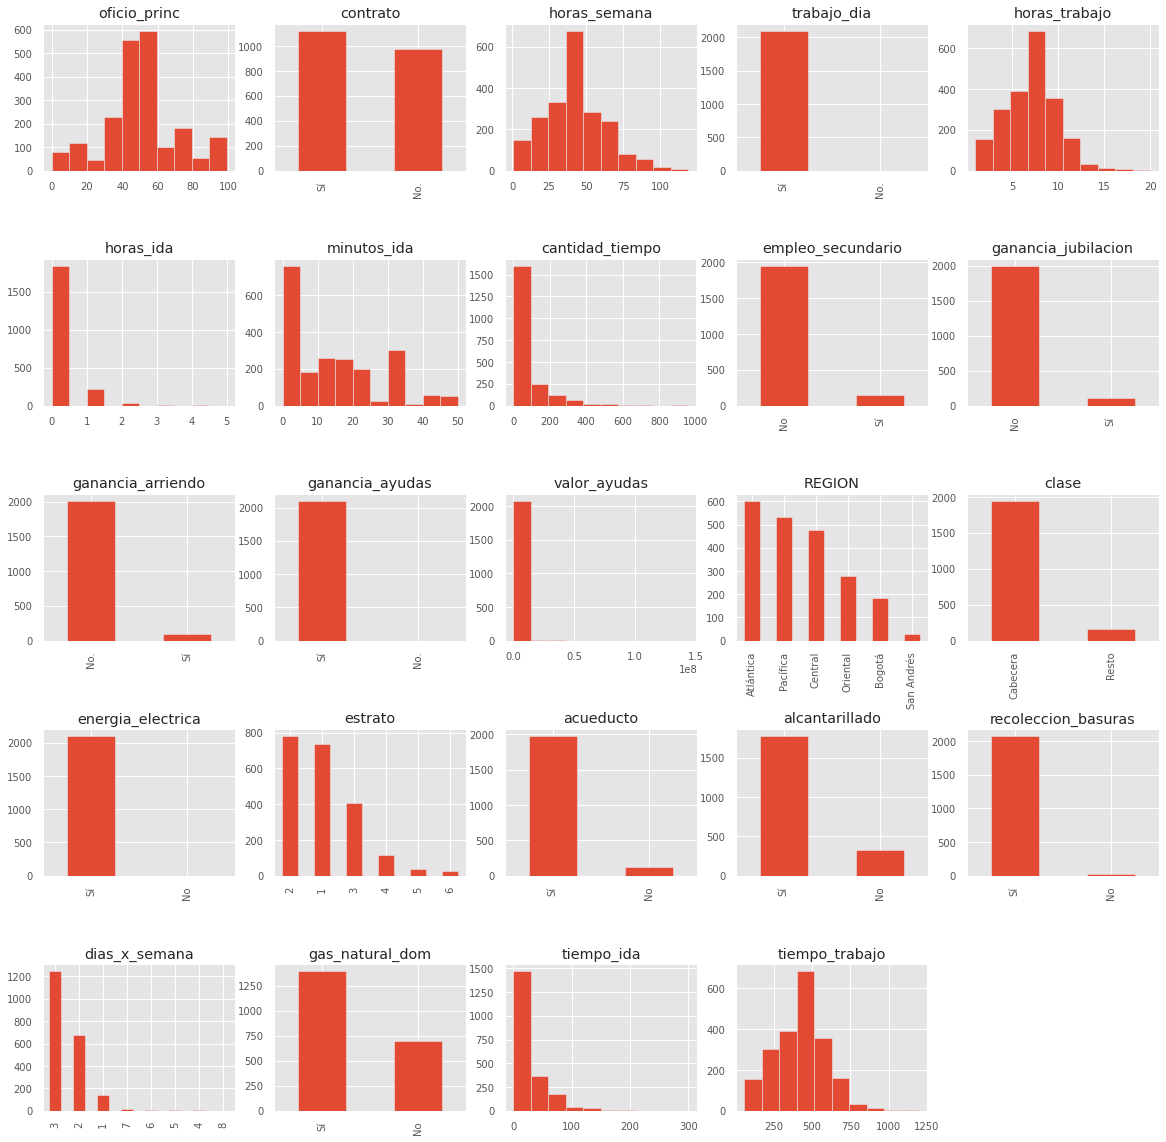

In [33]:
cols = 5
set2 = ['lugar_trabajo','este_trabajo','minutos_trabajo','numero_personas','ayuda_provino_de','tipo_vivienda']
columnas = [columna for columna in final.columns if columna not in set2]
fig, axs = plt.subplots(len(columnas)//cols +1, cols,figsize=(20,20) ) 
for i, columna in enumerate(columnas):
  if (final[columna].dtype==float):
    axs[i//cols][i%cols].hist(final[columna])
    axs[i//cols][i%cols].set_title(columna)
  else:    
    final[columna].value_counts().plot(kind='bar', title=columna, ax=axs[i//cols][i%cols])
plt.subplots_adjust(hspace=.6)
fig.delaxes(axs[4,2])
fig.delaxes(axs[4,3])
fig.delaxes(axs[4,4])

plt.show()
    


Podemos ver que hay variables con valores que superan de forma casi que absoluta a los demás posibles valores, algunos podrían obviarse pues acaparan todos los datos. Sin embargo, es necesaria una aprobación de un experto en el negocio.

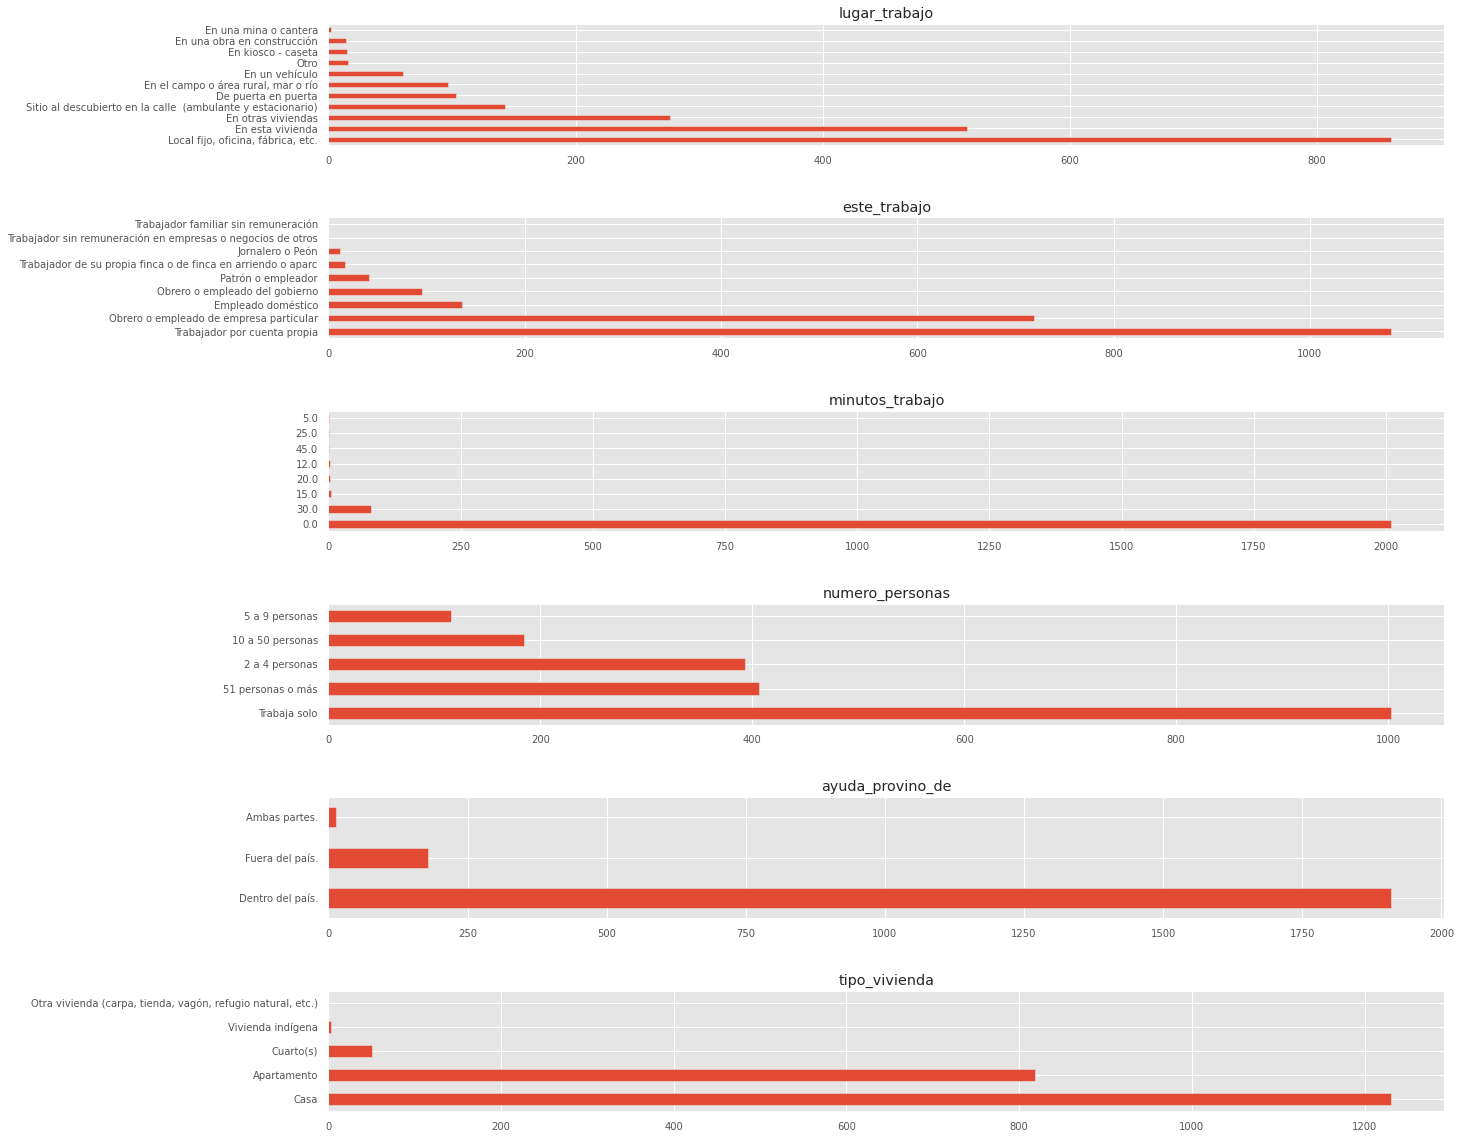

In [20]:

fig, axs = plt.subplots(len(set2), 1,figsize=(20,20) ) 
for i, columna in enumerate(set2):
  final[columna].value_counts().plot(kind='barh', title=columna, ax=axs[i])
plt.subplots_adjust(hspace=.6)
plt.show()


Se puede ver que hay un valor que supera con creces a las demás. Sin embargo, no alcanza a superar al 50% lo que nos indica que hay para algunas variables una variedad de valores útil para análisis posteriores.

## Análisis de hipótesis

### Análisis de la hipótesis 1

 _La región influye en la cantidad de tiempo que las personas emplean en movilizarse a su lugar de trabajo_

 Dado que los valores de la variable minutos_ida no sobrepasan 60 podemos usarlos y sumarlos con horas_ida *60 para obtener los minutos que emplean las personas en movilizarse a su lugar de trabajo

In [21]:
final['tiempo_ida'] = (final['horas_ida'] * 60) + final['minutos_ida']

In [22]:
final[['REGION','tiempo_ida']].groupby(by='REGION').agg(['mean','std','max','min'])

tiempo_ida                       
                 mean        std    max  min
REGION                                      
Atlántica   16.281924  23.511504  180.0  0.0
Bogotá      36.628415  32.923883  150.0  0.0
Central     23.237395  33.677985  300.0  0.0
Oriental    24.258993  32.925984  280.0  0.0
Pacífica    19.778612  22.083142  180.0  0.0
San Andrés  12.166667   7.273397   25.0  0.0

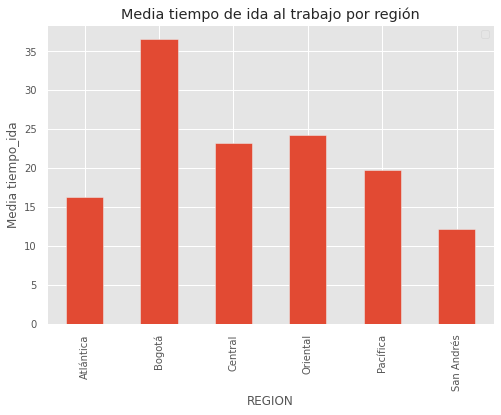

In [23]:
ax = final[['REGION',"tiempo_ida"]].groupby(by='REGION').mean().plot(kind='bar')
ax.set_ylabel( 'Media tiempo_ida (Minutos)' )
plt.title('Media tiempo de ida al trabajo por región')
ax.legend([])
plt.show()

Podemos ver que la media del tiempo de ida al trabajo en regiones costeras está entre 10 y 20 minutos mientras que en regiones del interior está entre 20 y 25 minutos y en Bogotá está sobre los 35 minutos.

### Análisis de la hipótesis 2
_El estrato determina cuanto tiempo duran las personas en el trabajo_

 Dado que los valores de la variable minutos_trabajo no sobrepasan 60 podemos usarlos y sumarlos con horas_trabajo *60 para obtener los minutos que emplean las personas en su lugar trabajo.

In [24]:
final['tiempo_trabajo'] = (final['horas_trabajo'] * 60) + final['minutos_trabajo']

In [25]:
final[['estrato','tiempo_trabajo']].groupby(by='estrato').agg(['mean','std','max','min'])

tiempo_trabajo                           
                  mean         std     max    min
estrato                                          
1           413.879076  174.231843   960.0   60.0
2           428.624041  184.598112  1200.0   60.0
3           447.764128  174.526208  1040.0   60.0
4           428.086957  155.698177   900.0  120.0
5           405.833333  191.957957   900.0   60.0
6           452.222222  193.516712   900.0   60.0

Podemos ver que la media del tiempo de trabajo un día específico está sobre 400 minutos para todos los estratos, teniendo la media más alta los estratos 3 y 6 y la media más baja los estratos 1 y 5.

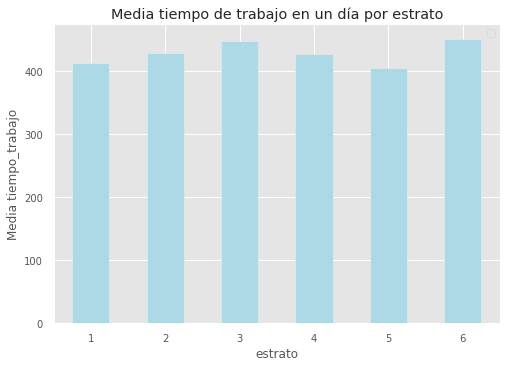

In [35]:
ax = final[['estrato',"tiempo_trabajo"]].groupby(by='estrato').mean().plot(kind='bar',color='lightblue')
ax.set_ylabel( 'Media tiempo_trabajo' )
ax.legend([])
plt.title('Media tiempo de trabajo en un día por estrato')
plt.xticks(rotation=0)
plt.show()

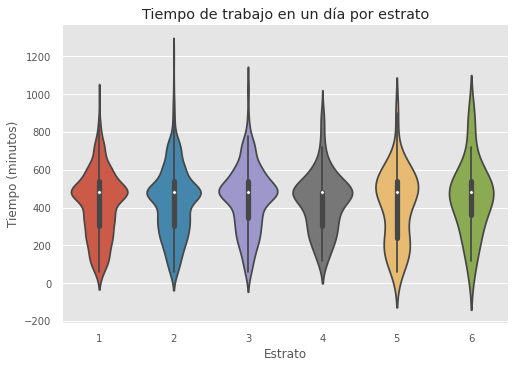

In [31]:
sns.violinplot(x=final["estrato"], y=final["tiempo_trabajo"])
plt.xlabel("Estrato")
plt.ylabel("Tiempo (minutos)")
plt.title("Tiempo de trabajo en un día por estrato")
plt.show()